<a href="https://colab.research.google.com/github/LordShadow505/Numerical-Methods/blob/main/Actividad_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



# **Tercera evaluación - Solución de ODEs**

Carlos Tavera & Erik Santoyo



---



# Ecuaciones y Preliminares

Librerias

In [ ]:
import numpy as np
from matplotlib import pyplot as plt



---



**Funciones**

Función 1:

In [ ]:
#Ejemplo 25.5

# Problema Inicial
def df(x,y): 
    f =4*(np.exp(0.8*x))-0.5*y
    return f

# Solución Exacta
def y(x):
    y = (4/1.3)*((np.exp(0.8*x))-(np.exp(-0.5*x)))+(2*np.exp(-0.5*x))
    return y

Función 2:

In [ ]:
#Ejemplo 25.6

# Problema Inicial
def df(x,y):
    f = -2*x**3+12*x**2-20*x+8.5 
    return f

# Solución Exacta
def y(x):
    y = -1/2*x**4+4*x**3-10*x**2+8.5*x
    return y



---



Parametros iniciales

In [ ]:
yi = 0      # Condicion inicial en y
xi = 0      # Condicion inicial en x
xf = 4      # Limite en x
h  = 0.01   # Tamaño de paso



---



# *Método de Euler*

Código:

In [ ]:
def Euler(df,x1,yi,xf,h):
    
    n    = np.int(abs(xf-x1)/float(h))+1
    x    = np.linspace(x1,xf,n)
    y    = np.zeros(n)
    y[0] = yi
   
    for i in range(n-1):
        
        dy     = df(x[i],y[i])
        y[i+1] = y[i] + h*dy
    return x,y

Graficas:

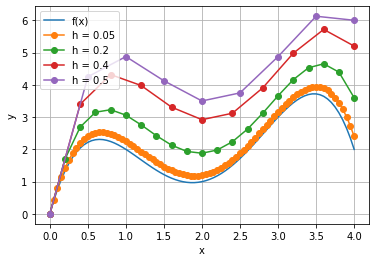

In [ ]:
x1,y1 = Euler(df,xi,yi,xf,0.05)
x2,y2 = Euler(df,xi,yi,xf,0.2)
x3,y3 = Euler(df,xi,yi,xf,0.4)
x4,y4 = Euler(df,xi,yi,xf,0.5)

ya    = y(x1)

# 0.05 0.2 0.4 0.5

# Graficar
plt.grid()
plt.plot(x1,ya,label='f(x)')
plt.plot(x1,y1,marker='o',label='h = 0.05')
plt.plot(x2,y2,marker='o',label='h = 0.2')
plt.plot(x3,y3,marker='o',label='h = 0.4')
plt.plot(x4,y4,marker='o',label='h = 0.5')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)


# *Método de Heun*

Código:

In [ ]:
def Heun(df,xi,yi,xf,h):
    
    n    = np.int(abs(xf-xi)/float(h))+1
    x    = np.linspace(xi,xf,n)
    y    = np.zeros(n)
    y[0] = yi
    
    for i in range(n-1):
        
        dy1    = df(x[i],y[i])
        dy2    = df(x[i]+h,y[i]+h*dy1)
        dyP    = 0.5*(dy1+dy2) #dyP = dyPromedio
        y[i+1] = y[i] + h*dyP
    return x,y

Graficas:

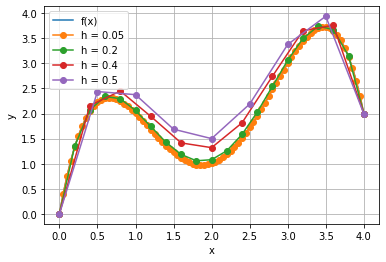

In [ ]:
x1,y1 = Heun(df,xi,yi,xf,0.05)
x2,y2 = Heun(df,xi,yi,xf,0.2)
x3,y3 = Heun(df,xi,yi,xf,0.4)
x4,y4 = Heun(df,xi,yi,xf,0.5)

ya    = y(x1)

# 0.05 0.2 0.4 0.5

# Graficar
plt.grid()
plt.plot(x1,ya,label='f(x)')
plt.plot(x1,y1,marker='o',label='h = 0.05')
plt.plot(x2,y2,marker='o',label='h = 0.2')
plt.plot(x3,y3,marker='o',label='h = 0.4')
plt.plot(x4,y4,marker='o',label='h = 0.5')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)



# *Método de Punto Medio*

Código:

In [ ]:
def PuntoMedio(df,xi,yi,xf,h):
    
    n    = np.int(abs(xf-xi)/float(h))+1
    x    = np.linspace(xi,xf,n)
    y    = np.zeros(n)
    y[0] = yi
   
    for i in range(n-1):
        
        xmit   = x[i]+0.5*h     #xmit, ymit = Mitad
        ymit   = y[i]+0.5*h*df(x[i],y[i])
        dyMit  = df(xmit,ymit)
        y[i+1] = y[i] + h*dyMit
    return x,y

Graficas:

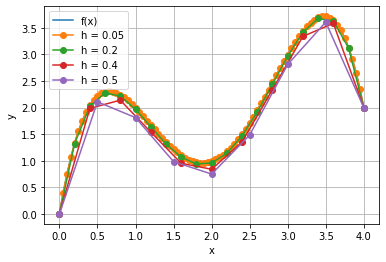

In [ ]:
x1,y1 = PuntoMedio(df,xi,yi,xf,0.05)
x2,y2 = PuntoMedio(df,xi,yi,xf,0.2)
x3,y3 = PuntoMedio(df,xi,yi,xf,0.4)
x4,y4 = PuntoMedio(df,xi,yi,xf,0.5)

ya    = y(x1)

# 0.05 0.2 0.4 0.5

# Graficar
plt.grid()
plt.plot(x1,ya,label='f(x)')
plt.plot(x1,y1,marker='o',label='h = 0.05')
plt.plot(x2,y2,marker='o',label='h = 0.2')
plt.plot(x3,y3,marker='o',label='h = 0.4')
plt.plot(x4,y4,marker='o',label='h = 0.5')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)




---



# *Método Runge-Kutta*

Código:

Runge-Kutta Orden 2

In [ ]:
def RungeKutta2(df,xi,yi,xf,h):
    
    n    = np.int(abs(xf-xi)/float(h))+1
    x    = np.linspace(xi,xf,n)
    y    = np.zeros(n)
    y[0] = yi
   
    for i in range(n-1):
        y1     = df(x[i],y[i])
        y2     = df(x[i]+0.75*h,y[i]+0.75*h*y1)
        y[i+1] = y[i] + (h/3.0)*(y1 + 2*y2)
    return x,y

Graficas:

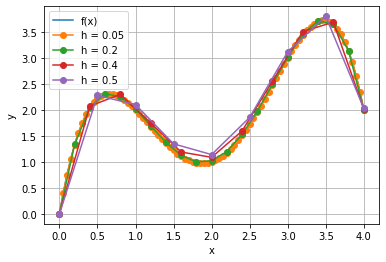

In [ ]:
x1,y1 = RungeKutta2(df,xi,yi,xf,0.05)
x2,y2 = RungeKutta2(df,xi,yi,xf,0.2)
x3,y3 = RungeKutta2(df,xi,yi,xf,0.4)
x4,y4 = RungeKutta2(df,xi,yi,xf,0.5)

ya    = y(x1)

# 0.05 0.2 0.4 0.5

# Graficar
plt.grid()
plt.plot(x1,ya,label='f(x)')
plt.plot(x1,y1,marker='o',label='h = 0.05')
plt.plot(x2,y2,marker='o',label='h = 0.2')
plt.plot(x3,y3,marker='o',label='h = 0.4')
plt.plot(x4,y4,marker='o',label='h = 0.5')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)


Runge-Kutta Orden 3

In [ ]:
def RungeKutta3(df,xi,yi,xf,h):
     
    n    = np.int(abs(xf-xi)/float(h))+1
    x    = np.linspace(xi,xf,n)
    y    = np.zeros(n)
    y[0] = yi
   
    for i in range(n-1):
        y1     = df(x[i],y[i])
        y2     = df(x[i]+0.5*h,y[i]+0.5*h*y1)
        y3     = df(x[i]+0.5*h,y[i]+0.5*h*y2)
        y[i+1] = y[i] + (h/5.0)*(y1 + 2*y2 + 2*y3)
    return x,y

Graficas:

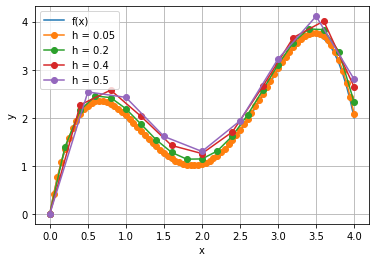

In [ ]:
x1,y1 = RungeKutta3(df,xi,yi,xf,0.05)
x2,y2 = RungeKutta3(df,xi,yi,xf,0.2)
x3,y3 = RungeKutta3(df,xi,yi,xf,0.4)
x4,y4 = RungeKutta3(df,xi,yi,xf,0.5)

ya    = y(x1)

# 0.05 0.2 0.4 0.5

# Graficar
plt.grid()
plt.plot(x1,ya,label='f(x)')
plt.plot(x1,y1,marker='o',label='h = 0.05')
plt.plot(x2,y2,marker='o',label='h = 0.2')
plt.plot(x3,y3,marker='o',label='h = 0.4')
plt.plot(x4,y4,marker='o',label='h = 0.5')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)


Runge-Kutta Orden 4

In [ ]:
def RungeKutta4(df,xi,yi,xf,h):
    
    n    = np.int(abs(xf-xi)/float(h))+1
    x    = np.linspace(xi,xf,n)
    y    = np.zeros(n)
    y[0] = yi
    
    for i in range(n-1):
        y1     = df(x[i],y[i])
        y2     = df(x[i]+0.5*h,y[i]+0.5*h*y1)
        y3     = df(x[i]+0.5*h,y[i]+0.5*h*y2)
        y4     = df(x[i]+h,y[i]+h*y3)
        y[i+1] = y[i] + (h/6.0)*(y1 + 2*y2 + 2*y3 + y4)
    return x,y

Graficas:

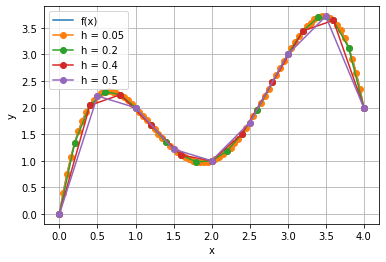

In [ ]:
x1,y1 = RungeKutta4(df,xi,yi,xf,0.05)
x2,y2 = RungeKutta4(df,xi,yi,xf,0.2)
x3,y3 = RungeKutta4(df,xi,yi,xf,0.4)
x4,y4 = RungeKutta4(df,xi,yi,xf,0.5)

ya    = y(x1)

# 0.05 0.2 0.4 0.5

# Graficar
plt.grid()
plt.plot(x1,ya,label='f(x)')
plt.plot(x1,y1,marker='o',label='h = 0.05')
plt.plot(x2,y2,marker='o',label='h = 0.2')
plt.plot(x3,y3,marker='o',label='h = 0.4')
plt.plot(x4,y4,marker='o',label='h = 0.5')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)


# Gráfica Comparadora

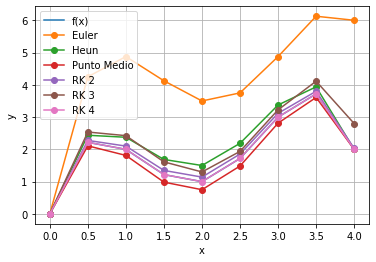

In [ ]:
from numpy.core.fromnumeric import size
x1,y1 = Euler(df,xi,yi,xf,0.5)
x2,y2 = Heun(df,xi,yi,xf,0.5)
x3,y3 = PuntoMedio(df,xi,yi,xf,0.5)
x4,y4 = RungeKutta2(df,xi,yi,xf,0.5)
x5,y5 = RungeKutta3(df,xi,yi,xf,0.5)
x6,y6 = RungeKutta4(df,xi,yi,xf,0.5)

ya    = y(x1)

# 0.05 0.2 0.4 0.5

# Graficar

#Limite (Para hacer zoom)
#plt.xlim(0, 2)
#plt.ylim(-1, 5)

plt.grid()
plt.plot(x1,ya,label='f(x)')
plt.plot(x1,y1,marker='o',label='Euler')
plt.plot(x2,y2,marker='o',label='Heun')
plt.plot(x3,y3,marker='o',label='Punto Medio')
plt.plot(x4,y4,marker='o',label='RK 2')
plt.plot(x5,y5,marker='o',label='RK 3')
plt.plot(x6,y6,marker='o',label='RK 4')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)